In [80]:
import pandas as pd 
import matplotlib
from csv import DictReader

In [81]:
def read_csv_rows(filename: str) -> list[dict[str, str]]:
    """Read the rows of a csv into a 'table'."""
    # Returns a list of the rows. 
    result: list[dict[str, str]] = [] 

    # Open a handle to the data file
    file_handle = open(filename, "r", encoding="utf8")
    
    # Read that file.
    # Prepare to read the data file as a CSV rather than just strings.
    csv_reader = DictReader(file_handle)

    # Read each row of CSV line-by-line
    for row in csv_reader:
        result.append(row)

    # Close that file when we're done, to free its resources.
    file_handle.close()

    return result


In [82]:
# Read CSV Data Generated from Social Security Administration on Most Popular Baby Names - 2018
SURVEY_DATA_CSV_FILE_PATH: str = "../data/yob2018.csv"
data = pd.read_csv(SURVEY_DATA_CSV_FILE_PATH, names = ['name', 'sex', 'ocurence'])
data

,name,sex,ocurence
0,Emma,F,18757
1,Olivia,F,17993
2,Ava,F,14975
3,Isabella,F,14517
4,Sophia,F,13972
...,...,...,...
32157,Zylas,M,5
32158,Zyran,M,5
32159,Zyrie,M,5
32160,Zyron,M,5


## Analysis of Male Names 

In [83]:
# Assign null value to all names assigned sex of female at birth 
male_data = data.mask(data['sex'] == 'F')
# # Drop the null values
# male_data = pd.DataFrame(male_data.Sex.notnull())
male_data = male_data.dropna()
male_data
top_ten = male_data.head(10)

### Top Ten Male Names

<BarContainer object of 10 artists>

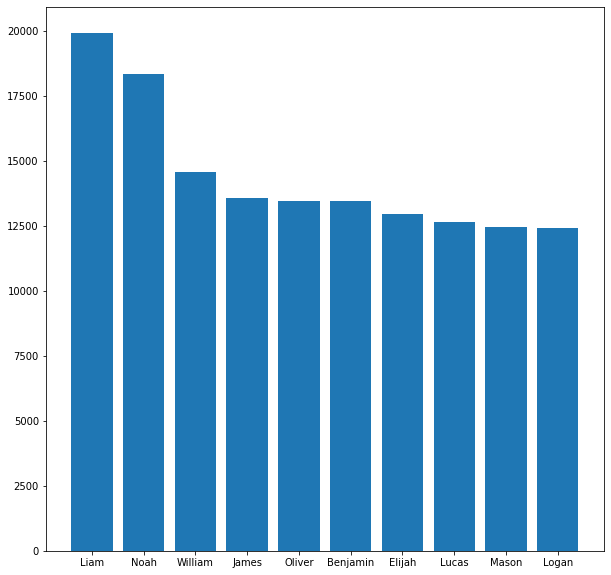

In [84]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
from matplotlib import pyplot as plt 
plt.bar(top_ten.name, top_ten.ocurence)

## Sort Data

In [85]:
# Sort the data by top values 
male_data = male_data.sort_values('Occurence', ascending=False)
top_five = male_data.head(10)


KeyError: 'Occurence'

## Determine the top first letter of the name in a given year

In [ ]:
result: dict[str, int] = {}
for name in male_data["name"]:
    if name[0] not in result:
        result[name[0]] = 1
    else:
        result[name[0]] += 1      
x = sorted(result.items())
first_letters = dict(x)
first_letters

{'A': 1578,
 'B': 671,
 'C': 717,
 'D': 932,
 'E': 574,
 'F': 197,
 'G': 339,
 'H': 410,
 'I': 248,
 'J': 1237,
 'K': 1344,
 'L': 524,
 'M': 928,
 'N': 425,
 'O': 237,
 'P': 230,
 'Q': 52,
 'R': 764,
 'S': 807,
 'T': 714,
 'U': 49,
 'V': 164,
 'W': 196,
 'X': 60,
 'Y': 260,
 'Z': 405}

<BarContainer object of 26 artists>

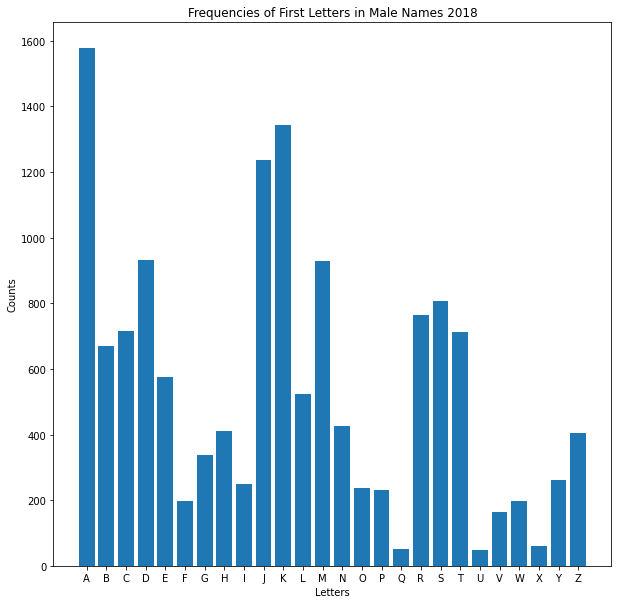

In [ ]:
plt.title("Frequencies of First Letters in Male Names 2018")
plt.xlabel("Letters")
plt.ylabel("Counts")
labels: list[str] = list(first_letters.keys())
values: list[int] = list(first_letters.values())
plt.bar(labels, values)